# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [79]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # open colume values

In [80]:
training_set.shape

(1258, 1)

In [81]:
training_set[0], training_set[0][0]

(array([325.25]), 325.25)

### Feature Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [83]:
training_set_scaled[0:10]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259]])

### Creating a data structure with 60 timesteps and 1 output

In [84]:
# 60일 전의 주가(3개월 전)로 현재 주가 예측

X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])


In [85]:
# 배열로 변환
X_train, y_train = np.array(X_train), np.array(y_train)

In [86]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

### Reshaping

In [87]:
# 똑같은 2차원 배열 추가(3차원으로)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [88]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


### Initialising the RNN

In [90]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [91]:
regressor.add(LSTM(units = 128
                   , return_sequences = True
                   , input_shape = (X_train.shape[1], 1)))

In [92]:
regressor.add(Dropout(rate = 0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [93]:
regressor.add(LSTM(units = 128
                   , return_sequences = True
                   ))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [94]:
regressor.add(LSTM(units = 128
                   , return_sequences = True
                   ))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [95]:
regressor.add(LSTM(units = 128
                  #  , return_sequences = False # 마지막 LSTM 층 False(생략가능)
                   ))
regressor.add(Dropout(0.2))

### Adding the output layer

In [96]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [97]:
# RNN에서는 주로 RMSprop(확률적 경사 하강법) or Adam(RMSprop + Momentum) 사용
regressor.compile(optimizer = 'adam'
                  , loss = 'mean_squared_error' # MSE: 평균 제곱 오차(회귀 시 사)
                  )

### Fitting the RNN to the Training set

In [98]:
regressor.fit(X_train, y_train
              , epochs = 100
              , batch_size =  32
              )

Epoch 1/100
38/38 [==============================] - 8s 16ms/step - loss: 0.0324
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 11/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [99]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [100]:
real_stock_price.shape

(20, 1)

### Getting the predicted stock price of 2017

In [101]:
# 데이터 셋 통합(예측에는 과거 60일치 데이터 필요)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [102]:
# 2017년 1월 3일 위치에서 과거 60일 전 위 구하기
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [103]:
inputs.shape

(80,)

In [104]:
# 2차원으로 변경
inputs = inputs.reshape(-1,1)

In [105]:
inputs.shape

(80, 1)

In [106]:
# test 데이터에는 fit 하지 않음
inputs = sc.transform(inputs)

In [107]:
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

In [108]:
X_test.shape

(20, 60)

In [109]:
# 모델 입력을 위한 3D 구조 만들기
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [110]:
X_test.shape

(20, 60, 1)

In [111]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [112]:
predicted_stock_price.shape

(20, 1)

In [113]:
# 원래 가격으로 정규화 되돌리기
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

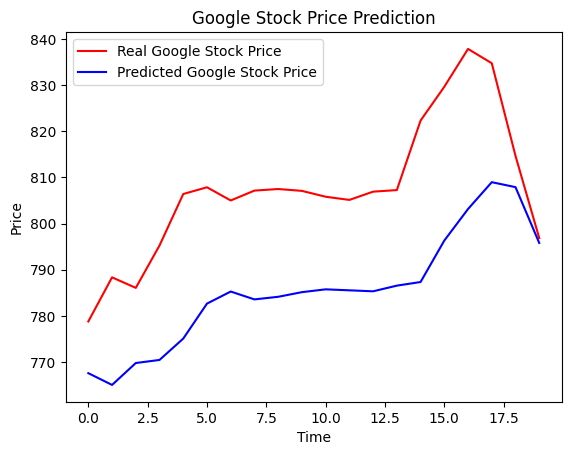

In [114]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE

In [115]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [116]:
rmse

23.504633596070278